In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy import sparse
import mglearn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
from scipy.stats import mode
#!pip install mlxtend
from mlxtend.plotting import scatterplotmatrix
plt.rcParams['image.cmap'] = "gray"
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
# cabbage_final.csv는 '고랭지배추:면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)' 컬럼을 전년도 데이터를 사용했다는
# 점에서 cabbage_merge.csv 파일과 다름.
cabbage_outlier = pd.read_csv('cabbage_final.csv',encoding='euc=kr',index_col=0)
cabbage_outlier

,일시,품목,품종,광역산지,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),연도,월,일,전년도 고랭지배추:면적 (ha),전년도 10a당 생산량 (kg),전년도 생산량 (톤)
0,2014-07-08,배추,고냉지배추,강원,500.000000,0.190000,0.38,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,2014,7,8,5099,3641,185655
1,2014-07-09,배추,고냉지배추,강원,581.000000,0.190000,0.32,21.381967,17.663934,25.318033,1.927869,1.952459,65.352459,5.714754,2014,7,9,5099,3641,185655
2,2014-07-10,배추,고냉지배추,강원,624.000000,0.320000,0.51,21.537705,17.901639,25.411475,1.927869,1.949180,65.834426,5.606557,2014,7,10,5099,3641,185655
3,2014-07-24,배추,고냉지배추,강원,828.666667,5.113333,19.30,23.577049,20.121311,27.290164,2.309836,1.988525,65.408197,5.724590,2014,7,24,5099,3641,185655
4,2014-07-25,배추,고냉지배추,강원,736.000000,6.990000,9.50,23.575410,20.149180,27.336066,2.480328,1.972131,66.034426,5.709836,2014,7,25,5099,3641,185655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2020-11-16,배추,고냉지배추,강원,443.000000,0.640000,1.44,15.267213,11.104918,20.050820,0.727869,2.321311,58.267213,6.542623,2020,11,16,4597,4756,218631
661,2020-11-18,배추,고냉지배추,강원,630.000000,0.450000,0.72,15.119672,10.877049,19.959016,0.727869,2.296721,58.755738,6.503279,2020,11,18,4597,4756,218631
662,2020-11-19,배추,고냉지배추,강원,550.000000,0.310000,0.57,15.104918,10.813115,19.937705,0.854098,2.336066,58.781967,6.362295,2020,11,19,4597,4756,218631
663,2020-11-20,배추,고냉지배추,강원,510.000000,0.550000,1.08,14.926230,10.640984,19.749180,0.854098,2.381967,58.762295,6.349180,2020,11,20,4597,4756,218631


In [3]:
cabbage_outlier.columns

Index(['일시', '품목', '품종', '광역산지', '일별 도매가격(원/kg) 평균', '일별 거래금액(백만원) 평균',
       '일별 거래량(톤) 합', '2달 평균기온(°C)', '2달 평균최저기온(°C)', '2달 평균최고기온(°C)',
       '일강수량(mm)', '2달 평균 풍속(m/s)', '2달 평균 상대습도(%)', '2달 평균 합계일조시간(hr)', '연도',
       '월', '일', '전년도 고랭지배추:면적 (ha)', '전년도 10a당 생산량 (kg)', '전년도 생산량 (톤)'],
      dtype='object')

In [5]:
date = cabbage_outlier['일시']
y=cabbage_outlier[['일별 도매가격(원/kg) 평균']]
x=cabbage_outlier.drop(columns=['일시', '품목', '품종', '광역산지','연도', '월', '일','일별 도매가격(원/kg) 평균'])

In [6]:
# StandardScaler를 이용한 scaling
X=x.values
y=y.values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:np.newaxis]).flatten()
# 훈련, 테스트 데이터 분할
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(x_std, y_std, test_size = 0.3, random_state=0)

In [7]:
#SVM 회귀 비선형 문제 다룰때 유용
from sklearn.svm import SVR
svr_lin = SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1) #epsilon 마진폭 조절
svr_lin.fit(X_std_train,y_std_train)
y_train_pred = svr_lin.predict(X_std_train)
y_test_pred = svr_lin.predict(X_std_test)
print('train score: %.3f, test score: %.3f'%(svr_lin.score(X_std_train, y_std_train),svr_lin.score(X_std_test, y_std_test)))


train score: 0.855, test score: 0.801


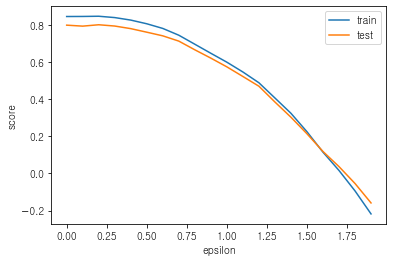

In [8]:
# epsilon
s_train=[]
s_test=[]
for i in np.arange(0.0,2.0,0.1):
    svr_lin = SVR(kernel='rbf', C=1.0, epsilon=i).fit(X_std_train,y_std_train)
    s_train.append(svr_lin.score(X_std_train,y_std_train))
    s_test.append(svr_lin.score(X_std_test,y_std_test))
plt.plot(np.arange(0.0,2.0,0.1),s_train,label='train')
plt.plot(np.arange(0.0,2.0,0.1),s_test, label='test')
plt.xlabel('epsilon')
plt.ylabel('score')
plt.legend()
plt.show()

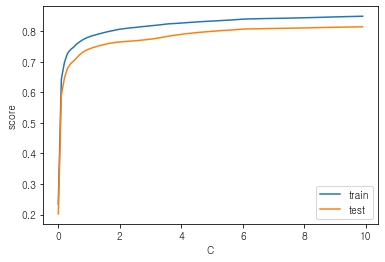

In [9]:
# 규제 
s_train=[]
s_test=[]
for i in np.arange(0.01,10.0,0.1):
    svr_lin = SVR(kernel='rbf', C=i, epsilon=0.6).fit(X_std_train,y_std_train)
    s_train.append(svr_lin.score(X_std_train,y_std_train))
    s_test.append(svr_lin.score(X_std_test,y_std_test))
plt.plot(np.arange(0.0,10.0,0.1),s_train,label='train')
plt.plot(np.arange(0.0,10.0,0.1),s_test, label='test')
plt.xlabel('C')
plt.ylabel('score')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_pred,y_std_test)

0.21696616564245247

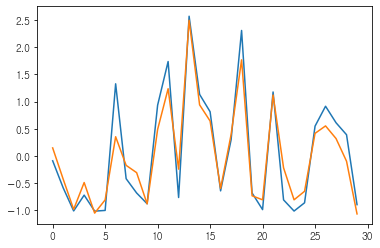

In [11]:
plt.plot(y_std_test[:30])
plt.plot(y_test_pred[:30])
plt.show()

In [12]:
# 배추예측.csv는 2달전(배추의 생육기간이 2달이므로)부터 현재시점까지의 데이터
배추 = pd.read_csv('배추예측.csv',encoding='cp949',index_col=0)

In [13]:
배추

,일시,품목,품종,광역산지,연도,월,일,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),전년도 고랭지배추:면적 (ha),전년도 10a당 생산량 (kg),전년도 생산량 (톤)
0,2021-08-26,배추,고냉지배추,강원,2021,8,26,601.400000,15.805000,571.31,25.1,20.4,28.4,0.0,1.6,75.3,0.3,4615,3977,185115
1,2021-08-25,배추,고냉지배추,강원,2021,8,25,847.142857,15.557500,192.72,23.2,21.6,25.4,2.0,0.9,92.1,0.0,4615,3977,185115
2,2021-08-24,배추,고냉지배추,강원,2021,8,24,579.250000,14.819200,569.22,23.2,21.5,25.6,25.3,0.9,91.5,0.3,4615,3977,185115
3,2021-08-23,배추,고냉지배추,강원,2021,8,23,600.523809,18.875238,599.97,24.9,22.5,27.4,2.1,2.0,69.5,0.0,4615,3977,185115
4,2021-08-21,배추,고냉지배추,강원,2021,8,21,549.521739,12.608696,527.72,24.9,21.2,28.6,2.7,1.4,81.4,1.6,4615,3977,185115
5,2021-08-20,배추,고냉지배추,강원,2021,8,20,522.411765,16.575556,637.37,24.1,21.0,27.1,0.0,1.5,80.9,0.0,4615,3977,185115
6,2021-08-19,배추,고냉지배추,강원,2021,8,19,580.600000,15.746000,500.43,23.1,21.4,26.1,9.9,2.3,84.3,0.7,4615,3977,185115
7,2021-08-18,배추,고냉지배추,강원,2021,8,18,590.125000,15.498571,399.08,22.4,20.8,24.7,124.1,1.8,89.5,0.2,4615,3977,185115
8,2021-08-17,배추,고냉지배추,강원,2021,8,17,508.812500,6.798750,260.73,21.9,20.9,23.3,23.8,1.8,89.6,0.1,4615,3977,185115
9,2021-08-16,배추,고냉지배추,강원,2021,8,16,566.153846,20.200000,537.01,23.5,20.7,26.4,0.0,1.4,78.3,0.1,4615,3977,185115


In [14]:
배추 = 배추.drop(columns=['일시', '품목', '품종', '광역산지', '연도', '월', '일', '일별 도매가격(원/kg) 평균'])

In [15]:
배추

,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),전년도 고랭지배추:면적 (ha),전년도 10a당 생산량 (kg),전년도 생산량 (톤)
0,15.805000,571.31,25.1,20.4,28.4,0.0,1.6,75.3,0.3,4615,3977,185115
1,15.557500,192.72,23.2,21.6,25.4,2.0,0.9,92.1,0.0,4615,3977,185115
2,14.819200,569.22,23.2,21.5,25.6,25.3,0.9,91.5,0.3,4615,3977,185115
3,18.875238,599.97,24.9,22.5,27.4,2.1,2.0,69.5,0.0,4615,3977,185115
4,12.608696,527.72,24.9,21.2,28.6,2.7,1.4,81.4,1.6,4615,3977,185115
5,16.575556,637.37,24.1,21.0,27.1,0.0,1.5,80.9,0.0,4615,3977,185115
6,15.746000,500.43,23.1,21.4,26.1,9.9,2.3,84.3,0.7,4615,3977,185115
7,15.498571,399.08,22.4,20.8,24.7,124.1,1.8,89.5,0.2,4615,3977,185115
8,6.798750,260.73,21.9,20.9,23.3,23.8,1.8,89.6,0.1,4615,3977,185115
9,20.200000,537.01,23.5,20.7,26.4,0.0,1.4,78.3,0.1,4615,3977,185115


In [16]:
x.head(1)

,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),전년도 고랭지배추:면적 (ha),전년도 10a당 생산량 (kg),전년도 생산량 (톤)
0,0.19,0.38,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,5099,3641,185655


In [17]:
z=sc_x.fit_transform(배추)

In [18]:
pred = svr_lin.predict(z)

In [19]:
sc_y.inverse_transform(pred)

array([ 844.13527777,  676.56623691,  537.91992981,  901.17891042,
        629.03904842,  772.15749628,  854.42478778,  932.23810281,
        567.32118428,  854.73007677,  599.00545712,  737.00919107,
        603.82549405,  796.0642837 , 1096.95386011, 1036.8033814 ,
       1129.33536921,  968.06829706,  992.52281283, 1200.23807685,
       1019.13227336,  991.95739538,  940.44786917,  842.24495795,
        755.0692881 ,  714.37620466,  701.74724694,  605.16153767,
        658.2285271 ,  665.45489709,  683.64387004,  730.57988202,
        864.25391587,  504.67160457,  604.47826009,  683.84127828,
        709.48750365,  483.80666418,  419.29367471,  497.7449905 ,
        541.23208915,  605.08916137,  572.84008282,  602.87662635,
        744.67989761,  640.18832568])